<div class="alert alert-block alert-danger">

# **FIT5196 Task 2 - Assessment 1**
    
#### Student Name: Alexandra Goh & Sothearith Tith
#### Student ID: 29796431 & 27208001

Date: 19th April 2024


Environment: Python 3.10.12

Libraries used:
* os
* pandas 1.1.0
* multiprocessing
* itertools
* nltk 3.5
* nltk.tokenize
* nltk.stem
* langdetect
* collections

</div>

<div class="alert alert-block alert-info">
    
## **Table of Contents**

</div>

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Examining and Loading Input File](#examine) <br>
$\;\;\;\;$[3.1. Read CSV file](#read) <br>
[4. Text Extraction and Cleaning](#text-extract) <br>
$\;\;\;\;$[4.1. Extract strings from CSV file into dictionary](#extract-dict) <br>
$\;\;\;\;$[4.2. Check for duplicate records](#duplicate) <br>
$\;\;\;\;$[4.3. Remove links and urls from 'textOriginal' field](#remove-links) <br>
$\;\;\;\;$[4.4. Remove emojis from 'textOriginal' field](#remove-emojis) <br>
[5. Count English Comments](#english-comments) <br>
$\;\;\;\;$[5.1. Detect English comments](#detect-english) <br>
$\;\;\;\;$[5.2. Tokenize comments](#tokenize) <br>
$\;\;\;\;$[5.3. Count number of English comments](#count-english) <br>
$\;\;\;\;$[5.4. Write to a CSV file](#write-csv) <br>
[6. Loading and Parsing Comments](#load-comments) <br>
$\;\;\;\;$[6.1. Get channels with number of English comments greater than 15](#eng-15) <br>
$\;\;\;\;$[6.2. Removing context-independent stopwords](#context-independent) <br>
$\;\;\;\;$[6.3. Analyzing the frequency of words across documents after removing stopwords](#freq-words) <br>
$\;\;\;\;$[6.4. Removing context-dependent stopwords](#context-dependent) <br>
$\;\;\;\;$[6.5. Removing rare tokens](#rare-tokens) <br>
$\;\;\;\;$[6.6. Stemming Tokens](#stem-tokens) <br>
$\;\;\;\;$[6.7. Removing tokens with length less than 3](#less-3) <br>
$\;\;\;\;$[6.8. Getting all unique unigrams](#unigrams) <br>
[7. Generating Bigrams](#GeneratingBigrams) <br>
$\;\;\;\;$[7.1. Getting Top 200 bigrams](#200-bigrams) <br>
$\;\;\;\;$[7.2. Ensuring collocations can be collocated within the same comment](#collocations) <br>
$\;\;\;\;$[7.3. Combining unigrams and bigrams in a single list](#combine-unigrams-bigrams) <br>
$\;\;\;\;$[7.4. Calculate the vocabulary containing both unigrams and bigrams](#calc-vocab) <br>
$\;\;\;\;$[7.5. Generate token index](#token-index) <br>
$\;\;\;\;$[7.6. Write output as vocab.txt](#vocab-txt) <br>
[8. Generating Sparse Numerical Representation](#sparse) <br>
$\;\;\;\;$[8.1. MWE Tokenizer](#mwe) <br>
$\;\;\;\;$[8.2. Write output as countvec.txt](#countvec-txt) <br>
[9. Summary](#summary) <br>
[10. References](#Ref) <br>

<div class="alert alert-block alert-warning">

## **1.  Introduction**  <a class="anchor" name="Intro"></a>
    
</div>


The foundational step in any NLP endeavor is the conversion of text into numerical values, allowing machines to comprehend and discern patterns within the language. This process is not only iterative but also critical in defining the features that will inform your machine learning model or algorithm.

We will be developing Python code to preprocess a collection of YouTube comments, sourced from an Excel file, and transform them into numerical representations.

These representations are crucial as they constitute the standard format for text data, rendering them compatible for integration into various Natural Language Processing (NLP) systems such as: recommender-systems, information-retrieval algorithms, machine-translation etc.

<div class="alert alert-block alert-warning">

## **2.  Importing Libraries**  <a class="anchor" name="libs"></a>
    
</div>


Any python packages is permitted to be used. The following packages were used to accomplish the related tasks:

Environment: Python 3.10.12

Libraries used:
* os (for interacting with the operating system, included in Python xxxx)
* pandas 1.1.0 (for dataframe, installed and imported)
* multiprocessing (for performing processes on multi cores, included in Python 3.6.9 package)
* itertools (for performing operations on iterables)
* nltk 3.5 (Natural Language Toolkit, installed and imported)
* nltk.tokenize (for tokenization, installed and imported)
* nltk.stem (for stemming the tokens, installed and imported)
* langdetect (for detecting language of the given text)
* collections (to implements specialized container datatypes)

In [1]:
!pip install langdetect
!pip install langid

import os
import re
import langid
import pandas as pd
import multiprocessing
from itertools import chain
import nltk
from nltk.probability import *
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import MWETokenizer
from nltk.stem import PorterStemmer
from nltk.util import ngrams
import ast
from langdetect import detect, DetectorFactory
from nltk import word_tokenize
from collections import Counter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=3b1fc8b961dc40661f2798cf14c0c7a85729b7f4bcde85f8579380f1415da46b
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=324f1d04c4adfd759a2b968b9402c4f8009e3a5e9aed5fdfd8904d510c549229
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


-------------------------------------

<div class="alert alert-block alert-warning">

## **3.  Examining and Loading Input File**  <a class="anchor" name="examine"></a>
    
</div>


The input file is an Excel file containing multiple worksheets with many YouTube comments data. Each Excel table consists of two columns:
* `id`: unique comment identifier
* `snippet`: a JSON array, in string format, that contains information about one top level comment for a particular YouTube video, such as the comment, the channel and author.

<br>

Our goal is to extract the ‘textOriginal’ fields in all top level comments for all YouTube videos listed. Here are some examples of ‘textOriginal’:
* `textOriginal`: 'Awesome bro love Ur way of teaching'

* `textOriginal`: 'https://youtube.com/shorts/rmMUmdBKBvU?si=dZeuo3mmpfLdnWZP.   English literature short notes on topic what is literature'

* `textOriginal`: 'help me please. Please please i need to help my mom\r\n.\r\n\r\n\r\n\r\nBinance pay ID : 346984027\r\n\r\nor\r\n\r\nUSDT trc20 address :TVq6tjrZdtj85xjRJooiAcuEGV8T1jbALR\r\n\r\nor \r\n\r\nBTC network address : 1D8bZwU6iBbefoHWdsn7nf4neFMQDzMbgE\r\n\r\nor \r\n\r\nBUSD BEP20 address : 0xa6e039d45c32a010d9b9afbc2d273a9e0ed2c915'

* `textOriginal`: '感想，上位期間，MV有浸浴缸浸過頭既鏡頭，唔應該著衫，完全無feel😅😅😅😅😅你話想表達果個情感又好，引起話題又好，都做唔倒，不如搵個肯唔著衫既做MV主角啦❤️'

<br>

Observing the variety in the `textOriginal` entries, we see that they are not exclusively in English and contain a diverse range of different elements including URLs, emojis, and numerical figures. This diversity highlights the complexity nature of the data thus, requiring sequential processing techniques to generate a vocabulary list and numerical representation for the corresponding text.

<div class="alert alert-block alert-warning">

### **3.1.  Read CSV file**  <a class="anchor" name="read"></a>
    
</div>


In [2]:
# Connect to Google Drive to access the excel file

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
# Because the data are positioned differently in each worksheet, we have to search through each row and column unitl we reach the data.
# Function to find the header row index and header columns
def find_data_start(sheet_data):
    for row in range(sheet_data.shape[0]):
        for col in range(sheet_data.shape[1]):
            value = sheet_data.iat[row, col]
            if pd.notnull(value):  # Found a non-empty cell, potentially a header
                return row, col
    return None, None

# Function to parse the Excel file
def parse_excel(file_path):
    # Load the Excel file
    xls = pd.ExcelFile(file_path)

    # Dictionary to hold data from all sheets
    all_sheets_data = {}
    all_records = []

    # Iterate through each sheet
    for sheet_name in xls.sheet_names:
        # Load the current sheet into a DataFrame
        sheet_data = pd.read_excel(xls, sheet_name=sheet_name, header=None)

        # Find the starting point of data
        header_row, header_col = find_data_start(sheet_data)
        if header_row is not None and header_col is not None:
            # Adjust header row, since pandas uses zero-based indexing
            # Calculate the columns to use by creating a range from the starting column to the end
            usecols = range(header_col, sheet_data.shape[1])

            # Now read the sheet again with proper skiprows and usecols
            df = pd.read_excel(xls, sheet_name=sheet_name, skiprows=header_row, usecols=usecols, header=0)
            all_sheets_data[sheet_name] = df
            all_records.append(df)
    df1 = pd.concat(all_records)

    return df1

# Pass the locate of the excel file then extract all the data and store in dataframe
file_path = '/content/drive/Shareddrives/FIT5196_S1_2024/A1/Students data/Task 2/Group055.xlsx'
data = parse_excel(file_path)
print("Shape of the dataframe", data.shape)
data.head()

Shape of the dataframe (97994, 2)


,id,snippet
0,Ugwva8CKemNx_Ue_xaR4AaABAg,"{'channelId': 'UCet0ZrYmw-V_hsGPb7KsiOQ', 'vid..."
1,UgwL8jb61ZlfP0QOpJx4AaABAg,"{'channelId': 'UC9x0AN7BWHpCDHSm9NiJFJQ', 'vid..."
2,UgxavbXjjaRRvNDQwMp4AaABAg,"{'channelId': 'UCBJycsmduvYEL83R_U4JriQ', 'vid..."
3,Ugym4CeCIsMF6WGYX454AaABAg,"{'channelId': 'UCL5eiGK1f0A-DecaBqq5emg', 'vid..."
4,UgxqNGLIsNsI_jm08p94AaABAg,"{'channelId': 'UC-0unh5x9WSd6aj0OGxrgaA', 'vid..."


<div class="alert alert-block alert-warning">

## **4.  Text Extraction and Cleaning**  <a class="anchor" name="text-extract"></a>
    
</div>


<div class="alert alert-block alert-warning">

### **4.1.  Extract strings from CSV file into dictionary**  <a class="anchor" name="extract-dict"></a>
    
</div>


The extracted `snippet` field contains many elements that we do not want, moreover, it is in string format. To get the text in `textOriginal` fields, we will use python `literal_eval()` function to convert from string to dictionary which makes it easier to get the text we want.

We used `apply()` function to appy `extract_data` function to every of the dataframe to extract `channelId` and `textOriginal` and store them in the two newly created columns.

We also used `try` and `except` to catch any row that cannot be changed to dictionary due to syntactic errors.

In [4]:
# get channelId and textOriginal
def extract_data(snippet):
    try:
      # convert snippet string to dictionary
      snippet_dict = ast.literal_eval(snippet)
      return [snippet_dict['topLevelComment']['snippet']['channelId'], snippet_dict['topLevelComment']['snippet']['textOriginal']]
    except Exception as e:
      # print(f"Error: {snippet}")
      # Any invalid rows will be mark for removal
      return ['TO_REMOVE','']

channelId_comment = data['snippet'].apply(extract_data)

data['channel_id'] = channelId_comment.apply(lambda x: x[0])
data['all_comments'] = channelId_comment.apply(lambda x: x[1])

# Display the new DataFrame
print("Shape of the dataframe", data.shape)
data.head()

Shape of the dataframe (97994, 4)


,id,snippet,channel_id,all_comments
0,Ugwva8CKemNx_Ue_xaR4AaABAg,"{'channelId': 'UCet0ZrYmw-V_hsGPb7KsiOQ', 'vid...",UCet0ZrYmw-V_hsGPb7KsiOQ,Same
1,UgwL8jb61ZlfP0QOpJx4AaABAg,"{'channelId': 'UC9x0AN7BWHpCDHSm9NiJFJQ', 'vid...",UC9x0AN7BWHpCDHSm9NiJFJQ,Awesome bro love Ur way of teaching
2,UgxavbXjjaRRvNDQwMp4AaABAg,"{'channelId': 'UCBJycsmduvYEL83R_U4JriQ', 'vid...",UCBJycsmduvYEL83R_U4JriQ,I think this is a good social tool as well som...
3,Ugym4CeCIsMF6WGYX454AaABAg,"{'channelId': 'UCL5eiGK1f0A-DecaBqq5emg', 'vid...",UCL5eiGK1f0A-DecaBqq5emg,What about night shift workers?what be the bes...
4,UgxqNGLIsNsI_jm08p94AaABAg,"{'channelId': 'UC-0unh5x9WSd6aj0OGxrgaA', 'vid...",UC-0unh5x9WSd6aj0OGxrgaA,Vicky嘅曲真係好好聽呢~


<div class="alert alert-block alert-warning">

### **4.2.  Check for duplicate records**  <a class="anchor" name="duplicate"></a>
    
</div>

After extracting all the comments in textOriginal and its corrosponding channel_id, we need to make sure that the data is well-suited for preparing textual data for analysis by ensuring it is free of duplicates and missing identifiers.

<br>

This preprocessing step is critical in data science projects, especially when dealing with large datasets where such issues can skew results and hinder analysis. This approach not only enhances data quality but also facilitates more accurate and reliable outcomes in subsequent analyses or machine learning applications.

* `drop_duplicates(subset=['channel_id', 'all_comments'], keep='first')`: this function call removes duplicate rows based on unique combinations of `channel_id` and `all_comments`. The `keep='first'` parameter ensures that only the first occurrence of a duplicate entry is kept, while subsequent duplicates are removed.
* `.dropna(subset=['channel_id'])` removes any rows where the `channel_id` is `NaN`. This is essential for ensuring data integrity, especially if the `channel_id` is crucial for subsequent analyses or operations.

In [5]:
# Remove duplicates based on 'channel_id' and 'all_comments'
remove_duplicate = data.drop_duplicates(subset=['id'], keep='first')
print("Number of duplicate rows removed:", len(remove_duplicate))

# Remove rows where 'channel_id' contains 'TO_REMOVE'
filtered_data = remove_duplicate[~remove_duplicate['channel_id'].str.contains('TO_REMOVE')]

# New dataframe containing only the columns that we need
channels_comments_data = filtered_data[['channel_id', 'all_comments']].copy()

print("Shape of the dataframe", channels_comments_data.shape)
channels_comments_data.head()

Number of duplicate rows removed: 82698
Shape of the dataframe (82697, 2)


,channel_id,all_comments
0,UCet0ZrYmw-V_hsGPb7KsiOQ,Same
1,UC9x0AN7BWHpCDHSm9NiJFJQ,Awesome bro love Ur way of teaching
2,UCBJycsmduvYEL83R_U4JriQ,I think this is a good social tool as well som...
3,UCL5eiGK1f0A-DecaBqq5emg,What about night shift workers?what be the bes...
4,UC-0unh5x9WSd6aj0OGxrgaA,Vicky嘅曲真係好好聽呢~


<div class="alert alert-block alert-warning">

### **4.3.  Remove links and urls from 'textOriginal' field**  <a class="anchor" name="remove-links"></a>
    
</div>

Some comments contain URls or HTML tags which need to be removed as they do not add any value to the text data. We used the `re` library, which provides regular expression matching operation to remove any HTML tags or URLS.

* Example of comments with URL: https://youtube.com/shorts/rmmumdbkbvu?si=dzeuo3mmpfldnwzp.   english literature short notes on topic what is literature

* Should be converted to:   english literature short notes on topic what is literature

<br>

``` r'<[^>]+>' ```
This regular expression will match any string that starts with an opening angle bracket `<`, followed by one or more characters that are not a closing angle bracket `>`, and ends with a closing angle bracket `>`. It is commonly used in parsing tasks to remove HTML tags from a text, as HTML tags are typically enclosed within angle brackets.

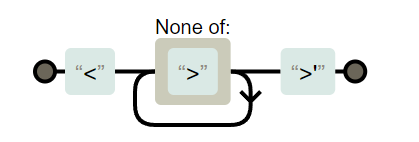

<br>

``` r'http\S+|www\S+' ```
This regular expresion will match any string that starts with "http", followed by any non-whitespace characters, or starts with "www", followed by any non-whitespace characters. This effectively captures most URLs, whether they start with "http://" or "www".

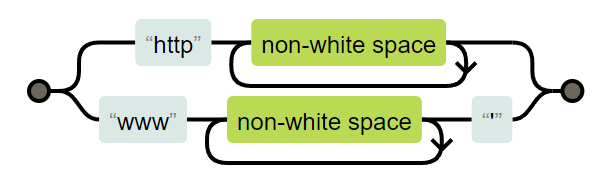

<br>

For each row in the dataframe, we used `apply()` function to pass the comment to `rmove_html_url()` function which will then return a cleaned comment.


In [6]:
# Remove html tags, urls and links
def remove_html_url(snippet):
    """
    Remove HTML Tags and URLs.
    """
    try:
        # Remove HTML tags
        clean_html = re.sub(r'<[^>]+>', '', snippet)
        # Remove URLs
        clean_url = re.sub(r'http\S+|www\S+', '', clean_html)
        return clean_url
    except Exception as e:
        print(f"Error: {snippet}")
        return snippet

# Apply the function to the 'all_comments' column
channels_comments_data['all_comments'] = channels_comments_data['all_comments'].apply(remove_html_url)

<div class="alert alert-block alert-warning">

### **4.4.  Remove emojis from 'textOriginal' field**  <a class="anchor" name="remove-emojis"></a>
    
</div>

Some comments contain emojis which can introduce ambiguity and noise, especially in tasks that rely on clear textual content leading to inconsistencies. Removing emojis can standardize the data, ensuring that the text is uniformly processed.

<br>

* Example of comment with emoji:
感想，上位期間，mv有浸浴缸浸過頭既鏡頭，唔應該著衫，完全無feel😅😅😅😅😅你話想表達果個情感又好，引起話題又好，都做唔倒，不如搵個肯唔著衫既做mv主角啦❤️

* Should be converted to:
感想，上位期間，mv有浸浴缸浸過頭既鏡頭，唔應該著衫，完全無feel你話想表達果個情感又好，引起話題又好，都做唔倒，不如搵個肯唔著衫既做mv主角啦

<br>

``` emoji_pattern = '|'.join([re.escape(s) for s in emoji_content]) ```
constructs a regular expression pattern to match emojis. `emoji_content` is a list or collection of emoji characters.

<br>

``` re.escape(s) ``` ensures that each emoji character in `emoji_content` is treated as a literal string in the regular expression, escaping any special characters that might be part of the emoji.

<br>

``` '|'.join([...]) ``` combines each escaped emoji into a single string with a vertical bar '|' between them, which represents the logical OR operator in regular expressions. This means the pattern will match any single emoji from the `emoji_content` list.

<br>

``` data['all_comments'] = data['all_comments'].apply(remove_emojis) ``` applies the `remove_emojis` function to each element in the `all_comments` column of the `data` dataframe. The apply() method iterates over each entry in the column, passing it to `remove_emojis` function to clean the text by stripping out emoji characters.

In [7]:
# Read emoji from emoji.txt
emoji_file_path = '/content/drive/Shareddrives/FIT5196_S1_2024/A1/emoji.txt'

with open(emoji_file_path, 'r') as emoji:
        # Read the content of the file
        emoji_content = emoji.read()

print("Number of emojis:", len(emoji_content))

Number of emojis: 14275


In [8]:
# Remove emoji
emoji_pattern = '|'.join([re.escape(s) for s in emoji_content])

def remove_emojis(snippet):
    """
    Remove emojis from the 'textOriginal' field of the snippet dictionary.
    """
    try:
      cleaned_text = re.sub(emoji_pattern, '', snippet)
      return cleaned_text
    except Exception as e:
      print(f"Error: {snippet}")
      return ''

# Apply the function to the 'snippet' column
channels_comments_data['all_comments'] = channels_comments_data['all_comments'].apply(remove_emojis)

<div class="alert alert-block alert-success">

## **5.  Count English Comments**  <a class="anchor" name="english-comments"></a>
    
</div>


<div class="alert alert-block alert-warning">

### **5.1. Detect English comments**  <a class="anchor" name="detect-english"></a>
    
</div>

After cleaning all the comments, we are now going to label each comment on whether the comment is in English or not.


``` if detect(snippet) == 'en': ``` If the detected language is English (denoted by 'en'), the function returns [1,1]. The first element in the returned list (1) indicates that the snippet is in English, and the second element (1) acts as a counter to keep track of the total number of snippets processed. If the detected language is not English, the function returns [0,1]. Here, 0 indicates the snippet is not in English, and 1 again seems to act as a total count.

<br>

``` data[['eng_comment_count', 'all_comment_count']] = data['all_comments'].apply(is_english).tolist() ``` The apply() method processes each snippet in `all_comments`, and the `is_english` function returns a list for each snippet.

<br>

``` .tolist() ``` converts the series of lists returned by apply() into a list of lists.

<br>

Finally, this list of lists is used to create two new columns in the dataframe: `eng_comment_count` and `all_comment_count`. The former stores the value indicating whether the comment is in English (1 for yes, 0 for no), and the latter to be a constant count (always 1), serving as a way to keep track of the total number of comments processed.

In [9]:
DetectorFactory.seed = 0

def is_english(snippet):
  try:
    # Detects the language of the text
    if detect(snippet) == 'en':
      #[eng,total]
      return [1,1]
    return [0,1]
  except Exception as e:
      # print(f"Error: {snippet}")
      return [0,1]

# Apply the function and split the results into two columns
channels_comments_data[['eng_comment_count', 'all_comment_count']] = channels_comments_data['all_comments'].apply(is_english).tolist()
print("The shape of channels_comments_data:", channels_comments_data.shape)
channels_comments_data.head()

The shape of channels_comments_data: (82697, 4)


,channel_id,all_comments,eng_comment_count,all_comment_count
0,UCet0ZrYmw-V_hsGPb7KsiOQ,Same,0,1
1,UC9x0AN7BWHpCDHSm9NiJFJQ,Awesome bro love Ur way of teaching,1,1
2,UCBJycsmduvYEL83R_U4JriQ,I think this is a good social tool as well som...,1,1
3,UCL5eiGK1f0A-DecaBqq5emg,What about night shift workers?what be the bes...,1,1
4,UC-0unh5x9WSd6aj0OGxrgaA,Vicky嘅曲真係好好聽呢~,0,1


<div class="alert alert-block alert-warning">

### **5.2. Tokenize comments**  <a class="anchor" name="tokenize"></a>
    
</div>

Now that we have do not have to worry about working with different languages, we can safely tokenize all the comments for further processing regardless of what languages they are in. This is because the regex pattern below will only capture comments that contain English alphabets.

<br>

* Example of untokenized comment: 'awesome bro love ur way of teaching'

* Will be converted to: [awesome, bro, love, ur, way, of, teaching]

<br>

The function below aims to tokenize the given snippet (a string of text) into individual words or tokens using RegexpTokenizer with the pattern ```r"[a-zA-Z]+"```, which matches sequences of one or more alphabetical characters, effectively ignoring numbers, punctuation, and special characters.  

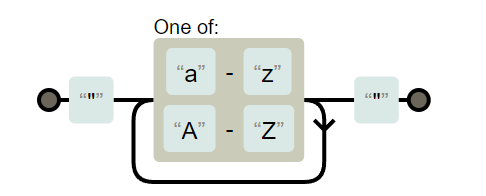

<br>

``` tokenizer.tokenize(snippet) ``` tokenizes the snippet based on the defined regular expression, splitting the text into tokens consisting only of alphabetic characters and returns a list of word tokens from the snippet.



``` data['word_tokenization'] = data['all_comments'].apply(tokenized_text) ```
applies the `tokenized_text` function directly to each element in the `all_comments` column of the data dataframe.
The results are stored in a new column `word_tokenization` in the same dataframe containing a list of tokens derived from the corresponding text in `all_comments` coulmn.

In [10]:
def tokenized_text(snippet):
  try:
      tokenizer = RegexpTokenizer(r"[a-zA-Z]+")
      return tokenizer.tokenize(snippet.lower())
  except Exception as e:
      print(f"Error: {snippet}")
      return ['']

# Apply the function and split the results into two columns
channels_comments_data['word_tokenization'] = channels_comments_data['all_comments'].apply(tokenized_text)

# data['word_tokenization'] = word_tokenization.apply(lambda x: x)
print("Shape of channels_comments_data:", channels_comments_data.shape)
channels_comments_data.head()

Shape of channels_comments_data: (82697, 5)


,channel_id,all_comments,eng_comment_count,all_comment_count,word_tokenization
0,UCet0ZrYmw-V_hsGPb7KsiOQ,Same,0,1,[same]
1,UC9x0AN7BWHpCDHSm9NiJFJQ,Awesome bro love Ur way of teaching,1,1,"[awesome, bro, love, ur, way, of, teaching]"
2,UCBJycsmduvYEL83R_U4JriQ,I think this is a good social tool as well som...,1,1,"[i, think, this, is, a, good, social, tool, as..."
3,UCL5eiGK1f0A-DecaBqq5emg,What about night shift workers?what be the bes...,1,1,"[what, about, night, shift, workers, what, be,..."
4,UC-0unh5x9WSd6aj0OGxrgaA,Vicky嘅曲真係好好聽呢~,0,1,[vicky]


<div class="alert alert-block alert-warning">

### **5.3. Count number of English comments**  <a class="anchor" name="count-english"></a>
    
</div>

To count the number of English comments, we aggregate the data in the dataframe by the `channel_id` column and then sum up the numerical columns (`eng_commnet_count` and `all_comment_couunt`) for each unique `channel_id`.

<br>

``` data.groupby('channel_id') ``` this function groups the dataframe by the unique values in the channel_id column. The `groupby` method is commonly used in pandas to split the data into groups based on some criteria, in this case, the `channel_id`.

<br>

``` .sum() ``` the sum method is applied to each group. This method adds up all the numerical values in each group for each numerical column in the dataframe. It's important to note that the summation will only apply to columns with numerical data; non-numeric columns(`word_tokenization`) will be handled differently .ie., join all arrays together.

<br>

The result of the grouping and summation is then assigned to a new variable called `grouped_data`.

In [11]:
grouped_data = channels_comments_data.groupby('channel_id').sum()
print("Shape of grouped data:", grouped_data.shape)
grouped_data.head()

Shape of grouped data: (1951, 4)


,all_comments,eng_comment_count,all_comment_count,word_tokenization
channel_id,,,,
UC-0unh5x9WSd6aj0OGxrgaA,Vicky嘅曲真係好好聽呢~感想，上位期間，MV有浸浴缸浸過頭既鏡頭，唔應該著衫，完全無fe...,3,55,"[vicky, mv, feel, mv, kay, d, so, damn, good, ..."
UC-3sBKh8YYbG2KyVHnSyA1A,Disney music gif me so HappinessI’m a year ol...,20,33,"[disney, music, gif, me, so, happiness, i, m, ..."
UC-9b7aDP6ZN0coj9-xFnrtw,There is a lot of nuance missing from this. Yo...,31,33,"[there, is, a, lot, of, nuance, missing, from,..."
UC-AlofdKECUdhXrbJQZ6iEg,I lovesongSwifte here come to the consert btw ...,49,92,"[i, lovesong, swifte, here, come, to, the, con..."
UC-B0ARaD-Y0p95aAqbbawQQ,SaturnPasé buscando esta canción por años!! P...,27,37,"[saturn, pas, buscando, esta, canci, n, por, a..."


<div class="alert alert-block alert-success">

### **5.4. Write to a CSV file**  <a class="anchor" name="write-csv"></a>
    
</div>

After we have counted the number of comments per channel, we can then save the output to a .csv file.

<br>

 `reset_index()` function is used to reset the index of the DataFrame, making it a regular column(s) again. This is necessary after grouping if you need to perform further DataFrame operations.

 <br>

``` .iloc[:, [0,5,4]]  ``` The iloc function is used to select specific columns or rows in a DataFrame by position. Here, it selects all rows (:) and the first (`channel_id`), sixth (`eng_comment_count`), and fifth (`all_comment_count`) columns.

<br>

``` to_csv('055_channel_list.csv', index=False) ```
writes the DataFrame `grouped_data_reset` to a CSV file named 055_channel_list.csv. The `index=False` parameter means that the DataFrame’s index will not be written to the CSV file. If index were `True`, each row would start with its index number in the CSV.

In [12]:
# Write the DataFrame to a CSV file
grouped_data_csv = grouped_data.reset_index().iloc[:, [0,3,2]]
grouped_data_csv.to_csv('055_channel_list.csv', index=False)

# If you want to download the file to your local system from Google Colab, you can use the files module
from google.colab import files
files.download('055_channel_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success">

## **6.  Loading and Parsing Comments**  <a class="anchor" name="load-comments"></a>
    
</div>


<div class="alert alert-block alert-success">

### **6.1. Get channels with number of English comments greater than 15**  <a class="anchor" name="eng-15"></a>
    
</div>

Now we need to filter out channels that have less than 15 comments. As the `grouped_data` dataframe already grouped the data by the unique values in the channel_id column, we filter the dataframe by only selecting the row, representing one channel, that has values greater than 15 in their `eng_comment_count` column and store it in the `filtered_data` dataframe.

<br>

`.iloc[:, [0,3,4,5,6]]` this iloc function is used to create a new dataframe `grouped_data_reset` by selecting only `channel_id`, `all_comment`, `word_tokenization`, `eng_comment_count` and `all_comment_count` coulmns for further processing such as getting all channels that have more than 15 English comments.

In [13]:
grouped_data_reset = grouped_data.reset_index()

# Filter the grouped DataFrame where 'eng_comment_count' is greater than or equal to 15
filtered_data = grouped_data_reset[grouped_data_reset['eng_comment_count'] >= 15].copy()
unfiltered_data = grouped_data_reset[grouped_data_reset['eng_comment_count'] >= 15].copy()

# Display the first few rows of the filtered data
print("Shape of filtered_data:", filtered_data.shape)
filtered_data.head()

Shape of filtered_data: (1331, 5)


,channel_id,all_comments,eng_comment_count,all_comment_count,word_tokenization
1,UC-3sBKh8YYbG2KyVHnSyA1A,Disney music gif me so HappinessI’m a year ol...,20,33,"[disney, music, gif, me, so, happiness, i, m, ..."
2,UC-9b7aDP6ZN0coj9-xFnrtw,There is a lot of nuance missing from this. Yo...,31,33,"[there, is, a, lot, of, nuance, missing, from,..."
3,UC-AlofdKECUdhXrbJQZ6iEg,I lovesongSwifte here come to the consert btw ...,49,92,"[i, lovesong, swifte, here, come, to, the, con..."
4,UC-B0ARaD-Y0p95aAqbbawQQ,SaturnPasé buscando esta canción por años!! P...,27,37,"[saturn, pas, buscando, esta, canci, n, por, a..."
6,UC-CSyyi47VX1lD9zyeABW3w,Make a video on _ Stop making useless ReelsDal...,21,30,"[make, a, video, on, stop, making, useless, re..."


In [14]:
# Store each channel and its tokens into a dictionary for MWE
unfiltered_dict = {row['channel_id']: row['word_tokenization'] for index, row in unfiltered_data.iterrows()}

print("Number of documents:", len(unfiltered_dict))

# Get all the words from the unfiltered_dict dictionary and store into a list
# to use for generating bigrams
unfiltered_words = list(chain.from_iterable(unfiltered_dict.values()))

print("Number of words:", len(unfiltered_words))

Number of documents: 1331
Number of words: 1170350


<div class="alert alert-block alert-success">

### **6.2. Removing context-independent stopwords**  <a class="anchor" name="context-independent"></a>
    
</div>

First of all, we need to remove context-independent stopwords (e.g. 'the', 'is', 'we') which is a common preprocessing step in text analysis and natural language processing (NLP) as it helps reduce the dataset size and focuses the analysis on words that carry more meaning.

<br>

By removing common words that do not contribute much information (stopwords), the remaining words are likely more relevant to the thematic substance of the texts. This can improve the accuracy and effectiveness of subsequent analysis like topic modeling, sentiment analysis, or keyword extraction.

<br>

The `f.read().splitlines()` reads the entire file content into a single string and then splits it into a list where each line becomes an element in the list. This way, each word in the stopwords file becomes a separate element in the stopwords list.

<br>

`stopwordsSet = set(stopwords)` then converts the list of stopwords into a set. Sets in Python provide a faster membership testing than lists, which is crucial here since the code checks membership for each word in the documents against the stopwords.

<br>

`remove_stopwords` function uses list comprehension to create a new list of words by filtering out any word in the token list that is a stopword.

<br>

The `apply()` method is then used to apply the `remove_stopwords` function to each element of the `word_tokenization` column of the `filtered_data` DataFrame.

In [15]:
# Read stopwords from stopwords file
stopwords_file_path = '/content/drive/Shareddrives/FIT5196_S1_2024/A1/stopwords_en.txt'

stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as f:
    stopwords = f.read().splitlines()

In [16]:
# Remove stopwords
stopwordsSet = set(stopwords)

def remove_stopwords(token):
  return [w for w in token if w not in stopwordsSet]

filtered_data['word_tokenization'] = filtered_data['word_tokenization'].apply(remove_stopwords)

filtered_data.head()

,channel_id,all_comments,eng_comment_count,all_comment_count,word_tokenization
1,UC-3sBKh8YYbG2KyVHnSyA1A,Disney music gif me so HappinessI’m a year ol...,20,33,"[disney, music, gif, happiness, year, disney, ..."
2,UC-9b7aDP6ZN0coj9-xFnrtw,There is a lot of nuance missing from this. Yo...,31,33,"[lot, nuance, missing, mention, volcanoes, pre..."
3,UC-AlofdKECUdhXrbJQZ6iEg,I lovesongSwifte here come to the consert btw ...,49,92,"[lovesong, swifte, consert, btw, idc, spelled,..."
4,UC-B0ARaD-Y0p95aAqbbawQQ,SaturnPasé buscando esta canción por años!! P...,27,37,"[saturn, pas, buscando, esta, canci, por, os, ..."
6,UC-CSyyi47VX1lD9zyeABW3w,Make a video on _ Stop making useless ReelsDal...,21,30,"[make, video, stop, making, useless, reels, da..."


<div class="alert alert-block alert-success">

### **6.3. Analyzing the frequency of words across documents after removing stopwords**  <a class="anchor" name="freq-words"></a>
    
</div>

Even though we removed all the tokens that were in the stopwords list, there may be some tokens that are not in the list and occur frequently across all channels. Here, we will try to find find those tokens.

<br>

`[set(tokenlist) for tokenlist in to_filter_dict.values()]` uses list comprehension combined with set to ensure that each token is counted once per channel (as sets eliminate duplicates within a channel).

<br>

`chain.from_iterable` is then used to flatten the list of sets into a single list, where each token appears as many times as it is present in different tokens.

<br>

`FreqDist()` is a constructor from the Natural Language Toolkit (nltk) that creates a frequency distribution. A frequency distribution is essentially a count of how often each token appears in the dataset. Here, `words_count1` (which contains all unique words from each channel, aggregated) is used to compute this frequency distribution.

Number of unique tokens:  56303
Number of channel:  1331
99% of channel 1317.69 



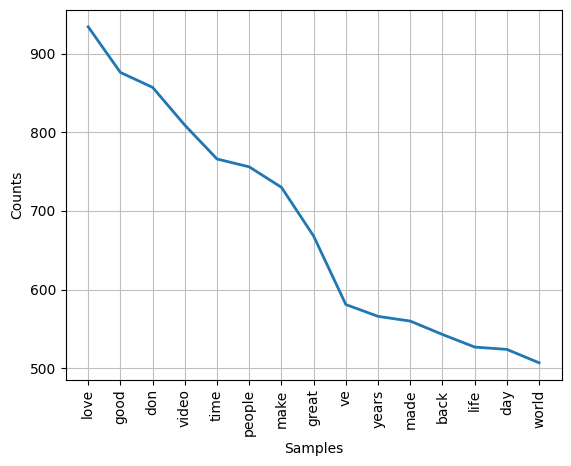


Top 5 most frequent tokens: [('love', 934), ('good', 876), ('don', 857), ('video', 809), ('time', 766)]


In [17]:
# counting number of documents the word is in after removing stopwords
words_count1 = list(chain.from_iterable([set(row['word_tokenization']) for index, row in filtered_data.iterrows()]))

# returns a list of the top 5 most common words along with their counts
word_freq1 = FreqDist(words_count1)
print("Number of unique tokens: ", len(word_freq1))
print("Number of channel: ", len(filtered_data))
print("99% of channel", len(filtered_data)*0.99, "\n")
word_freq1.plot(15, cumulative=False)
print("\nTop 5 most frequent tokens:", word_freq1.most_common(5))

<div class="alert alert-block alert-success">

### **6.4. Removing context-dependent stopwords**  <a class="anchor" name="context-dependent"></a>
    
</div>

By knowing which tokens are present in nearly all documents, one might consider these as potential candidates for an extended stopword list, especially if these tokens are not meaningful for analysis. The purpose of this code is to identify tokens that are extremely common across the document corpus.

<br>

We have 1300 documents and 99% of documents is 1287 so any tokens that appear more 1287 times will be considered as context-dependent and will be removed. However, from the frequency distribution graph above that shows the top 15 most common tokens, we can see that 'love' appears the most at ~900 times, which means that there are no tokens that can be considered as context-dependent stopwords.

<br>

`word_freq.most_common()` method from the FreqDist object returns all tokens sorted by their frequency in descending order. Each element in the output is a tuple where `v` is the token and `k` is the number of channels in which the token appears.

<br>

The function, `remove_ninety_nine_percent_words`, is designed to take a list of tokens and return a new list that excludes any tokens found in the `ninety_nine_percent_words` set.

In [18]:
# 99% words
ninety_nine_percent = [word for v,k in word_freq1.most_common() if k >= len(filtered_data)*0.99]
print("99% toekns:")
print(ninety_nine_percent)

99% toekns:
[]


In [19]:
# Remove 99% words
ninety_nine_percent_words = set(ninety_nine_percent)

def remove_ninety_nine_percent_words(token):
  return [w for w in token if w not in ninety_nine_percent_words]

filtered_data['word_tokenization'] = filtered_data['word_tokenization'].apply(remove_ninety_nine_percent_words)

filtered_data.head()

,channel_id,all_comments,eng_comment_count,all_comment_count,word_tokenization
1,UC-3sBKh8YYbG2KyVHnSyA1A,Disney music gif me so HappinessI’m a year ol...,20,33,"[disney, music, gif, happiness, year, disney, ..."
2,UC-9b7aDP6ZN0coj9-xFnrtw,There is a lot of nuance missing from this. Yo...,31,33,"[lot, nuance, missing, mention, volcanoes, pre..."
3,UC-AlofdKECUdhXrbJQZ6iEg,I lovesongSwifte here come to the consert btw ...,49,92,"[lovesong, swifte, consert, btw, idc, spelled,..."
4,UC-B0ARaD-Y0p95aAqbbawQQ,SaturnPasé buscando esta canción por años!! P...,27,37,"[saturn, pas, buscando, esta, canci, por, os, ..."
6,UC-CSyyi47VX1lD9zyeABW3w,Make a video on _ Stop making useless ReelsDal...,21,30,"[make, video, stop, making, useless, reels, da..."


<div class="alert alert-block alert-success">

### **6.5. Removing rare tokens**  <a class="anchor" name="rare-tokens"></a>
    
</div>

After removing context-dependent stopwords that appear frequently in 99% of the channels, we also need to consider rare tokens that appear in less than 1% of the total number of channels.

<br>

Tokens that are too rare may not provide enough information or could be outliers, such as typos or very uncommon proper nouns. By eliminating infrequently occurring tokens, the overall dataset size is reduced, which can optimize processing speed and improve the performance of NLP models that might be negatively impacted by too sparse data.

<br>

`word_freq.most_common()` function returns all word-frequency pairs from the frequency distribution `word_freq`, where each token (`v`) is paired with the number of documents it appears in (`k`). The tokens are then sorted by frequency in descending order.

Number of unique words:  56303
Number of doc:  1331
1% of doc 13.31 



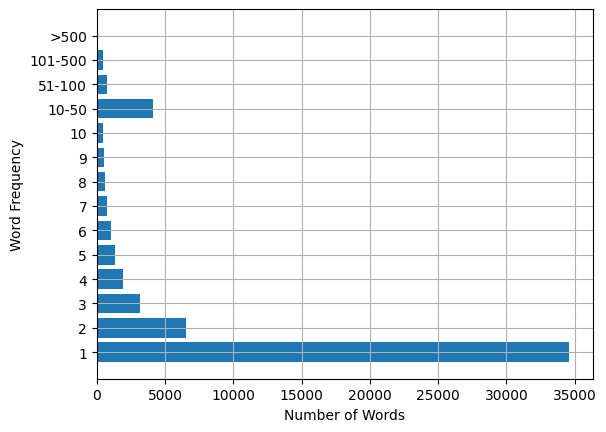

In [20]:
# counting number of documents the word is in after stemming
words_count2 = list(chain.from_iterable([set(row['word_tokenization']) for index, row in filtered_data.iterrows()]))

# returns a list of words along with their counts
word_freq2 = FreqDist(words_count2)
print("Number of unique words: ", len(word_freq2))
print("Number of doc: ", len(filtered_data))
print("1% of doc", len(filtered_data)*0.01, "\n")

ffd = FreqDist(word_freq2.values())
from pylab import *
y = [0]*14
for k, v in ffd.items():
     if k <= 10:
        y[k-1] = v
     elif k >10 and k <= 50:
        y[10] =  y[10] + v
     elif k >50 and k <= 100:
        y[11] =  y[11] + v
     elif k > 100 and k <= 500:
        y[12] =  y[12] + v
     else:
        y[13] =  y[13] + v
x = range(1, 15) # generate integer from 1 to 14
ytks =list(map(str, range(1, 11))) # covert a integer list to a string list
ytks.append('10-50')
ytks.append('51-100')
ytks.append('101-500')
ytks.append('>500')
barh(x,y, align='center')
yticks(x, ytks)
xlabel('Number of Words')
ylabel('Word Frequency')
grid(True)

As we can see from the word frequency graph above, there are over 30,000 tokens that appear only once and over 5000 tokens which appear twice. As we set the threshold for rare tokens at 1%, any token that appear less than 13 times will therefore be removed.

<br>

`one_percent_words = set(one_percent)` converts the list of rare tokens into a set for faster membership testing, which is essential in the next step where each token in each channel is checked against this set.

<br>

The `remove_ninety_nine_percent_words` function is defined to filter out any tokens from the input tokens that is present in `ninety_nine_percent_words`. This function is then applied to each list of tokens in the `word_tokenization` column of `filtered_data`. The result is a new list of tokens for each document, excluding tokens that appear in 99% or more of the documents.

In [21]:
# 1% words
one_percent = [v for v,k in word_freq2.most_common() if k <= len(filtered_data)*0.01]
print("1% tokens:")
print(one_percent)

1% tokens:
['copyright', 'filling', 'traveled', 'widely', 'twenty', 'liberty', 'rescue', 'thr', 'intense', 'measures', 'cherry', 'programmed', 'cooling', 'incident', 'forgive', 'afghanistan', 'saturday', 'vale', 'supportive', 'bana', 'worrying', 'ironic', 'sought', 'clarify', 'connecting', 'rainbow', 'louder', 'influenced', 'muslims', 'gaps', 'labour', 'demonic', 'documentaries', 'lasted', 'bizarre', 'lewis', 'historically', 'unity', 'glorious', 'segment', 'numerous', 'steady', 'cleared', 'firstly', 'fame', 'circumstances', 'blah', 'parks', 'righteous', 'portugal', 'filmed', 'musicians', 'excuses', 'additionally', 'diagnosed', 'meditation', 'vampire', 'gifts', 'coke', 'farmers', 'germans', 'dynamics', 'romance', 'viruses', 'elderly', 'infected', 'molecules', 'ecosystem', 'kevin', 'pills', 'tricky', 'trending', 'routine', 'worn', 'smash', 'seasons', 'extraordinary', 'achievement', 'geometry', 'coconut', 'che', 'spoke', 'license', 'stroke', 'ridiculously', 'regularly', 'sounding', 'instr

In [22]:
# Remove 1% words
one_percent_words = set(one_percent)

def remove_one_percent_words(token):
  return [w for w in token if w not in one_percent_words]

filtered_data['word_tokenization'] = filtered_data['word_tokenization'].apply(remove_one_percent_words)

filtered_data.head()

,channel_id,all_comments,eng_comment_count,all_comment_count,word_tokenization
1,UC-3sBKh8YYbG2KyVHnSyA1A,Disney music gif me so HappinessI’m a year ol...,20,33,"[disney, music, happiness, year, disney, fan, ..."
2,UC-9b7aDP6ZN0coj9-xFnrtw,There is a lot of nuance missing from this. Yo...,31,33,"[lot, missing, mention, previous, temperature,..."
3,UC-AlofdKECUdhXrbJQZ6iEg,I lovesongSwifte here come to the consert btw ...,49,92,"[btw, wrong, guys, made, famous, melbourne, co..."
4,UC-B0ARaD-Y0p95aAqbbawQQ,SaturnPasé buscando esta canción por años!! P...,27,37,"[pas, esta, canci, por, os, en, el, light, la,..."
6,UC-CSyyi47VX1lD9zyeABW3w,Make a video on _ Stop making useless ReelsDal...,21,30,"[make, video, stop, making, useless, media, kn..."


<div class="alert alert-block alert-success">

### **6.6. Stemming Tokens**  <a class="anchor" name="stem-tokens"></a>
    
</div>

In a corpus with multiple documents, stopwords and rare tokens may skew the consistency of word frequencies across documents. By removing them first, stemming can be applied uniformly across the corpus where we convert various forms of a word to a single base form using `PorterStemmer`. After removing stopwords and rare words, the remaining text is more likely to represent the key themes and content. Stemming this refined set of words ensures that the variations of a word (like "run", "runs", "running") are conflated to a single base form.

<br>

The `PorterStemmer` is an algorithm for stemming English words, and it's widely used due to its simplicity and efficiency. The statement `stemmer = PorterStemmer()` initializes a Porter stemmer instance from the NLTK library.

<br>

The `stemming()` function takes a list of words (token) as input and uses a list comprehension to apply the `stem()` method of the `Porter Stemmer` to each word.

<br>

The `apply()` method is used to apply the `stemming` function to each element of the `word_tokenization` column in the `filtered_data` dataframe. This operation updates each list of tokens with their stemmed versions.

In [23]:
# Stemming tokens using Porter stemmer
stemmer = PorterStemmer()

def stemming(token):
  return [stemmer.stem(word) for word in token]

filtered_data['word_tokenization'] = filtered_data['word_tokenization'].apply(stemming)

filtered_data.head()

,channel_id,all_comments,eng_comment_count,all_comment_count,word_tokenization
1,UC-3sBKh8YYbG2KyVHnSyA1A,Disney music gif me so HappinessI’m a year ol...,20,33,"[disney, music, happi, year, disney, fan, love..."
2,UC-9b7aDP6ZN0coj9-xFnrtw,There is a lot of nuance missing from this. Yo...,31,33,"[lot, miss, mention, previou, temperatur, due,..."
3,UC-AlofdKECUdhXrbJQZ6iEg,I lovesongSwifte here come to the consert btw ...,49,92,"[btw, wrong, guy, made, famou, melbourn, conce..."
4,UC-B0ARaD-Y0p95aAqbbawQQ,SaturnPasé buscando esta canción por años!! P...,27,37,"[pa, esta, canci, por, os, en, el, light, la, ..."
6,UC-CSyyi47VX1lD9zyeABW3w,Make a video on _ Stop making useless ReelsDal...,21,30,"[make, video, stop, make, useless, media, know..."


<div class="alert alert-block alert-success">

### **6.7. Removing tokens with length less than 3**  <a class="anchor" name="less-3"></a>
    
</div>

`remove_short_words` is designed to filter out tokens that are considered too short to be meaningful for the analysis. Short tokens often include conjunctions, prepositions, and other less informative types of words, though they can sometimes include important words like "no" and "up".

<br>

Moreover, after stemming, some tokens' lengths can become less than 3 and lose their meaning. For example, row 4 in the table above of the `filtered_data` has `pas` then `pa` after stemming.

In [24]:
# Removing all tokens with lenght < 3

def remove_short_words(token):
  return [word for word in token if len(word) >= 3]

filtered_data['word_tokenization'] = filtered_data['word_tokenization'].apply(remove_short_words)

filtered_data.head()

,channel_id,all_comments,eng_comment_count,all_comment_count,word_tokenization
1,UC-3sBKh8YYbG2KyVHnSyA1A,Disney music gif me so HappinessI’m a year ol...,20,33,"[disney, music, happi, year, disney, fan, love..."
2,UC-9b7aDP6ZN0coj9-xFnrtw,There is a lot of nuance missing from this. Yo...,31,33,"[lot, miss, mention, previou, temperatur, due,..."
3,UC-AlofdKECUdhXrbJQZ6iEg,I lovesongSwifte here come to the consert btw ...,49,92,"[btw, wrong, guy, made, famou, melbourn, conce..."
4,UC-B0ARaD-Y0p95aAqbbawQQ,SaturnPasé buscando esta canción por años!! P...,27,37,"[esta, canci, por, light, grab, radio, una, er..."
6,UC-CSyyi47VX1lD9zyeABW3w,Make a video on _ Stop making useless ReelsDal...,21,30,"[make, video, stop, make, useless, media, know..."


<div class="alert alert-block alert-success">

### **6.8. Getting all unique unigrams**  <a class="anchor" name="unigrams"></a>
    
</div>

We then extract a list of unigrams (single words) across all channels.

In [25]:
# concatenate all the tokenized patents(cleaned) using the chain.frome_iterable function
unigrams = list(chain.from_iterable([set(row['word_tokenization']) for index, row in filtered_data.iterrows()]))
print("Total number of unigrams:", len(unigrams))

Total number of unigrams: 193860


<div class="alert alert-block alert-success">

## **7.  Generating Bigrams**  <a class="anchor" name="GeneratingBigrams"></a>
    
</div>


<div class="alert alert-block alert-success">

### **7.1. Getting Top 200 bigrams**  <a class="anchor" name="200-bigrams"></a>
    
</div>

After getting unigrams, we now proceed to identify bigrams that are not only frequent but also have a strong association.

<br>

We are combining all tokenized comments into one list to analyze bigrams to gain an insight into the overall, global bigram relationships across the entire dataset or corpus. This is effective in identifying which word pairs are most commonly used across all texts, which can help in understanding common language usage or prevalent phrases in a corpus.

<br>

`bigram_measures = nltk.collocations.BigramAssocMeasures()` creates an instance of `BigramAssocMeasures`, which is a class that provides various statistical measures to evaluate the strength of association between word pairs (bigrams). These measures include likelihood ratios, pointwise mutual information (PMI), chi-squared, among others.

<br>

`bigram_finder = nltk.collocations.BigramCollocationFinder.from_words(unfiltered_words)` initializes a BigramCollocationFinder object for a list of words (`unfiltered_words`). This object is capable of finding bigrams within the provided list and calculating their frequencies.

<br>

`bigram_finder.apply_freq_filter(20)` filters out bigrams that appear fewer than 20 times in the entire dataset. Because PMI favors rare word pairs; hence, without the filters, it is more likely to see bigrams that include uncommon and possibly uninformative words ranking highly just because they don't often appear together or with other words.

<br>

`bigram_finder.apply_word_filter(lambda w: len(w) < 3)# or w.lower() in ignored_words)` filters out bigrams containing tokens that do not meet certain criteria. The lambda function `lambda w: len(w) < 3` specifies that words with less than three characters should be excluded.

<br>

`top_200_bigrams = bigram_finder.nbest(bigram_measures.pmi, 200) # Top-200 bigrams` selects the top 200 bigrams based on the pointwise mutual information (PMI) measure provided by bigram_measures.pmi. PMI is a measure of the association between two tokens, indicating how much more often they appear together than would be expected if they were statistically independent.


In [26]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = nltk.collocations.BigramCollocationFinder.from_words(unfiltered_words)
bigram_finder.apply_freq_filter(20)
bigram_finder.apply_word_filter(lambda w: len(w) < 3)# or w.lower() in ignored_words)
top_200_bigrams = bigram_finder.nbest(bigram_measures.pmi, 200) # Top-200 bigrams
print("Number of bigrams:", len(top_200_bigrams))
print("List of top 200 bigrams")
print(top_200_bigrams)

Number of bigrams: 200
List of top 200 bigrams
[('darude', 'sandstorm'), ('youyou', 'oughta'), ('moluwu', 'politically'), ('whatcha', 'gon'), ('capybara', 'capybara'), ('sandstorm', 'remix'), ('remix', 'darude'), ('blah', 'blah'), ('meow', 'meow'), ('maple', 'syrup'), ('taylor', 'swift'), ('mouminoune', 'quran'), ('plot', 'twist'), ('fossil', 'fuel'), ('elon', 'musk'), ('artificial', 'intelligence'), ('mur', 'mur'), ('mur', 'murder'), ('zodiac', 'sign'), ('north', 'korea'), ('global', 'warming'), ('behaving', 'individuals'), ('address', 'web'), ('web', 'address'), ('united', 'states'), ('ice', 'cream'), ('vision', 'pro'), ('harry', 'potter'), ('roman', 'empire'), ('national', 'park'), ('joe', 'biden'), ('cloud', 'practitioner'), ('void', 'main'), ('murder', 'mur'), ('jesus', 'christ'), ('comment', 'section'), ('social', 'media'), ('both', 'sides'), ('black', 'holes'), ('flu', 'shot'), ('mental', 'health'), ('middle', 'east'), ('yallah', 'yallah'), ('real', 'estate'), ('quantum', 'mecha

<div class="alert alert-block alert-success">

### **7.2. Ensuring collocations can be collocated within the same comment**  <a class="anchor" name="collocations"></a>
    
</div>

The purpose of this code is to validate the presence of any of the Top 200 bigrams within any of the comments.

<br>

`zip(comment, comment[1:])` creates pairs of consecutive words (bigrams) from each `word_tokenization` row. The zip function pairs the first word with the second, the second with the third, and so on.

<br>

`set(zip(comment, comment[1:]))` converts these pairs into a set, eliminating any duplicate bigrams within the same comment.

<br>

`chain.from_iterable` flattens a list of sets (one set per comment) into a single set containing all unique bigrams across all comments.

<br>

`check_bigram()` function passes the entire column of tokenized text `(filtered_data['word_tokenization'])` and a list of top 200 bigrams to check against.

In [27]:
# Set to hold bigrams that exist in the comments
validated_bigrams = set()

# Define the checking function
def check_bigram(tokenized_text_list, bigrams):
    # Generate a set of all bigrams for this list of tokenized comments
    all_bigrams_in_comment = set(chain.from_iterable(set(zip(comment, comment[1:])) for comment in tokenized_text_list))

    # Check each bigram in the top 200 bigrams if it is present in the set of all bigrams in the data
    for bigram in bigrams:
        if bigram in all_bigrams_in_comment:
            validated_bigrams.add(bigram)

# Execute the function
check_bigram(unfiltered_data['word_tokenization'], top_200_bigrams)

# Convert the set back to a list if necessary
validated_bigrams = list(validated_bigrams)
print("Number of bigram collocated within the same comment:", len(validated_bigrams))
print("List of bigram")
print(validated_bigrams)

Number of bigram collocated within the same comment: 200
List of bigram
[('machine', 'learning'), ('fossil', 'fuel'), ('last', 'year'), ('ever', 'seen'), ('crash', 'course'), ('everything', 'else'), ('artificial', 'intelligence'), ('quantum', 'mechanics'), ('lord', 'jesus'), ('can', 'imitate'), ('south', 'africa'), ('social', 'media'), ('joe', 'biden'), ('dealing', 'with'), ('vision', 'pro'), ('super', 'easy'), ('capybara', 'capybara'), ('days', 'ago'), ('faster', 'than'), ('better', 'than'), ('something', 'else'), ('come', 'across'), ('black', 'holes'), ('really', 'enjoyed'), ('quantum', 'computing'), ('year', 'old'), ('deal', 'with'), ('very', 'useful'), ('most', 'powerful'), ('behaving', 'individuals'), ('looking', 'forward'), ('talks', 'about'), ('good', 'luck'), ('remix', 'darude'), ('mental', 'health'), ('many', 'times'), ('health', 'insurance'), ('harry', 'potter'), ('turns', 'out'), ('make', 'sense'), ('years', 'ago'), ('addicted', 'like'), ('cant', 'wait'), ('united', 'states'

<div class="alert alert-block alert-success">

### **7.3. Combining unigrams and bigrams in a single list**  <a class="anchor" name="combine-unigrams-bigrams"></a>
    
</div>

Now that we have both bigrams and unigrams, we need to combine them together to form a vocabulary list. This list is then sorted alphabetically in an ascending order.

In [28]:
# Extend the vocabulary list with bigrams
# Each bigram is joined by an underscore to make it a single token
unigrams.extend(['_'.join(bigram) for bigram in validated_bigrams])

# Remove duplicates and sort
vocabulary = sorted(set(unigrams))

print("Vocabulary:")
print(vocabulary)

Vocabulary:
['aap', 'abil', 'abroad', 'absolut', 'absurd', 'abt', 'abus', 'academ', 'academi', 'accent', 'accept', 'access', 'accid', 'accident', 'account', 'accur', 'achiev', 'acid', 'acknowledg', 'act', 'action', 'activ', 'actor', 'actress', 'actual', 'adam', 'adapt', 'add', 'addict', 'addicted_like', 'addit', 'address', 'address_web', 'adhd', 'adjust', 'administr', 'admir', 'admit', 'adopt', 'ador', 'adult', 'advanc', 'advantag', 'adventur', 'advic', 'advis', 'aesthet', 'affect', 'afford', 'afraid', 'africa', 'african', 'age', 'agenc', 'agenda', 'agent', 'aggress', 'agi', 'ago', 'agre', 'agreement', 'agricultur', 'ahead', 'ahh', 'ahhh', 'aid', 'aim', 'ain', 'aint', 'air', 'aka', 'alarm', 'alaska', 'album', 'alcohol', 'algeria', 'algo', 'algorithm', 'alien', 'aliv', 'allah', 'allow', 'almighti', 'alot', 'alright', 'altern', 'amaz', 'amazingli', 'amazon', 'amen', 'america', 'american', 'american_dad', 'amo', 'amount', 'analog', 'analysi', 'ancestor', 'ancient', 'andrew', 'android', 'a

<div class="alert alert-block alert-success">

### **7.4. Calculate the vocabulary containing both unigrams and bigrams**  <a class="anchor" name="calc-vocab"></a>
    
</div>

After combining all bigrams and unique unigrams together, we can then calculate the number of vocabulary we have.

In [29]:
# Count the number of vocabulary
print("Number of vocabulary containing both unigrams and bigrams:", len(vocabulary))

Number of vocabulary containing both unigrams and bigrams: 3122


<div class="alert alert-block alert-success">

### **7.5. Generate token index**  <a class="anchor" name="token-index"></a>
    
</div>

After forming the vocabulary list, we need to map each token to a unique index. It is crucial for many NLP tasks where tokens (words, phrases, symbols, etc.) need to be represented as numerical values so that it can facilitate various operations and optimizations that are critical for processing text at scale.

In [30]:
# Generate a token index: a dictionary mapping each token to a unique integer
token_index = {token: index for index, token in enumerate(vocabulary)}

print("List of token with their index:")
print(token_index)

List of token with their index:
{'aap': 0, 'abil': 1, 'abroad': 2, 'absolut': 3, 'absurd': 4, 'abt': 5, 'abus': 6, 'academ': 7, 'academi': 8, 'accent': 9, 'accept': 10, 'access': 11, 'accid': 12, 'accident': 13, 'account': 14, 'accur': 15, 'achiev': 16, 'acid': 17, 'acknowledg': 18, 'act': 19, 'action': 20, 'activ': 21, 'actor': 22, 'actress': 23, 'actual': 24, 'adam': 25, 'adapt': 26, 'add': 27, 'addict': 28, 'addicted_like': 29, 'addit': 30, 'address': 31, 'address_web': 32, 'adhd': 33, 'adjust': 34, 'administr': 35, 'admir': 36, 'admit': 37, 'adopt': 38, 'ador': 39, 'adult': 40, 'advanc': 41, 'advantag': 42, 'adventur': 43, 'advic': 44, 'advis': 45, 'aesthet': 46, 'affect': 47, 'afford': 48, 'afraid': 49, 'africa': 50, 'african': 51, 'age': 52, 'agenc': 53, 'agenda': 54, 'agent': 55, 'aggress': 56, 'agi': 57, 'ago': 58, 'agre': 59, 'agreement': 60, 'agricultur': 61, 'ahead': 62, 'ahh': 63, 'ahhh': 64, 'aid': 65, 'aim': 66, 'ain': 67, 'aint': 68, 'air': 69, 'aka': 70, 'alarm': 71, 'a

<div class="alert alert-block alert-success">

### **7.6. Write output as vocab.txt**  <a class="anchor" name="vocab-txt"></a>
    
</div>

In [35]:
# Write the vocabulary to a text file
with open('055_vocab.txt', 'w') as file:
    for word in token_index:
        file.write(str(word) + ':' + str(token_index[word]) + '\n')

# If you want to download the file to your local system from Google Colab, you can use the files module
from google.colab import files
files.download('055_vocab.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success">

## **8.  Generating  Sparse Numerical Representation**  <a class="anchor" name="sparse"></a>
    
</div>


<div class="alert alert-block alert-success">

### **8.1. MWE Tokenizer**  <a class="anchor" name="mwe"></a>
    
</div>

Lastly, we will use MWE Tokenizer to retokenize each channel and recognise bigrams so that we can generate sparse numerical representation, including bigrams.

<br>

`mwetokenizer = MWETokenizer(validated_bigrams)` initializes the MWE Tokenizer where the `MWETokenizer` is a tool from the NLTK library designed to tokenize text with the recognition of multi-word expressions (bigrams in this case). `validated_bigrams` consists of tuples representing significant two-word combinations. The tokenizer will treat these bigrams as single tokens when they appear in the text, which helps in preserving the semantic meaning of phrases that are split in typical single-word tokenization.

<br>

`colloc_patents = dict((channel, mwetokenizer.tokenize(tokens)) for channel, tokens in to_filter_dict.items())` creates a dictionary `colloc_patents` where each key is a document identifier (`channel`) and each value is the tokenized version of the document (`tokens`). The `to_filter_dict` is a dictionary containing document text where `mwetokenizer.tokenize()` function is applied to each document, recognizing and merging any multi-word expressions that match the entries in `validated_bigrams`.


In [32]:
mwetokenizer = MWETokenizer(validated_bigrams)
colloc_patents =  dict((channel, mwetokenizer.tokenize(tokens)) for channel,tokens in unfiltered_dict.items())

<div class="alert alert-block alert-success">

### **8.2. Write output as countvec.txt**  <a class="anchor" name="countvec-txt"></a>
    
</div>

The final step involves writing a frequency distribution of tokens for different "channels" into a text file, formatting each channel's data into a specific structure that combines the channel identifier and token frequencies.

In [36]:
# Write the countvec to a text file
with open('055_countvec.txt', 'w') as file:
  for channel in colloc_patents:
    token_frequencies  = FreqDist(colloc_patents[channel])
    pdict = {token_index[n]: token_frequencies[n] for n in token_frequencies if n in token_index}

    # Convert dictionary items to string and join them with a comma
    pdict_str = ', '.join(f"{key}:{value}" for key, value in pdict.items())
    file.write(str(channel) + "," + pdict_str + "\n")

# If you want to download the file to your local system from Google Colab, you can use the files module
from google.colab import files
files.download('055_countvec.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success">

## **9.  Summary**  <a class="anchor" name="summary"></a>
    
</div>


Overall, we have carried out text pre-processing in the following sequence:

1. Reading CSV files and extracting text.
2. Data cleaning: remove duplicates, urls, http tags, null values and emojis.
3. Counting English comments.
4. Tokenization: breaking down paragraphs or sentences into smaller components.
5. Stopword Removal: remove stopwords from the text.
6. Removing Frequent and Rare Tokens: filtering out rare tokens, which are words that appear very infrequently within the dataset.
7. Stemming: reduces words to their root form, thereby conflating derivationally related words with a common base form
8. Handling Bigrams: handling bigrams by identifying and validating common pairs of words.
9. Creation of sparse representation: mapping the generated token with the vocabs and counting the frequency for each channel
10. Saving sparese respresentation as text file, vocabulary list as text file and channel list as csv file.

<br>

In summary, we have created a text pre-processing pipeline that is comprehensive and addresses the typical challenges of preparing raw text for deeper NLP analysis and modeling. It involves cleaning, normalizing, reducing, and structuring text data into a form that highlights the most meaningful and discriminative elements of the text, thus making it suitable for sophisticated analysis and prediction tasks.

-------------------------------------

<div class="alert alert-block alert-success">

## **10.  References**  <a class="anchor" name="Ref"></a>
    
</div>


[1] Pandas dataframe.drop_duplicates(), https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/, Accessed 03/04/2024.



## --------------------------------------------------------------------------------------------------------------------------

[My Workspace](https://colab.research.google.com/drive/1N7byY8F4QLcVQcbqkGPm0flv92p6Okjl?usp=sharing)